In [15]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import style
style.use("fivethirtyeight")

In [16]:
#Read the csv file into a DataFrame
df = pd.read_csv(r"BTC_USD_Full.csv")

In [35]:
df.head(10)

,HL_Perc,CO_Perc,Adj Close,Volume,PriceNextMonth
0,3.481708,-1.831006,457.334015,21056800,383.757996
1,10.592001,-7.096262,424.440002,34483200,391.441986
2,11.261215,-6.910351,394.795990,37919700,389.545990
3,8.570005,3.605767,408.903992,36863600,382.845001
4,4.894691,-2.270110,398.821014,26580100,386.475006
5,2.464175,0.764721,402.152008,24127600,383.157990
6,11.448854,8.380911,435.790985,45099500,358.416992
7,3.557082,-2.879172,423.204987,30627700,358.345001
8,3.431771,-2.737052,411.574005,26814400,347.270996
9,3.732162,-1.702359,404.424988,21460800,354.704010


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3495 entries, 0 to 3494
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3495 non-null   object 
 1   Open       3495 non-null   float64
 2   High       3495 non-null   float64
 3   Low        3495 non-null   float64
 4   Close      3495 non-null   float64
 5   Adj Close  3495 non-null   float64
 6   Volume     3495 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 191.3+ KB


In [19]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3495.000000,3495.000000,3495.000000,3495.000000,3495.000000,3.495000e+03
mean,15750.335726,16119.781022,15359.645648,15769.433283,15769.433283,1.706024e+10
std,17447.923277,17870.136310,16993.028126,17469.046933,17469.046933,1.926718e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,1001.202515,1032.380005,976.365997,1004.500000,1004.500000,2.048605e+08
50%,8616.129883,8807.016602,8370.801758,8657.642578,8657.642578,1.272690e+10
75%,26578.964844,27007.546875,26243.682618,26594.130859,26594.130859,2.745429e+10
max,73079.375000,73750.070313,71334.093750,73083.500000,73083.500000,3.509679e+11


In [20]:
#Make two new columns which will be used for making predictions.
df["HL_Perc"] = (df["High"]-df["Low"]) / df["Low"] * 100
df["CO_Perc"] = (df["Close"] - df["Open"]) / df["Open"] * 100

In [21]:
dates = np.array(df["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [22]:
df = df[["HL_Perc", "CO_Perc", "Adj Close", "Volume"]]

In [23]:
#Define the label column
df["PriceNextMonth"] = df["Adj Close"].shift(-30)

In [24]:
df.isnull().sum()

HL_Perc            0
CO_Perc            0
Adj Close          0
Volume             0
PriceNextMonth    30
dtype: int64

In [25]:
df.tail()

,HL_Perc,CO_Perc,Adj Close,Volume,PriceNextMonth
3490,2.080992,0.675566,69362.554688,21204930369,NaN
3491,5.286552,3.270936,71631.359375,37261432669,NaN
3492,5.174366,-3.480940,69139.015625,36426900409,NaN
3493,5.318041,2.093774,70587.882813,38318601774,NaN
3494,1.660772,1.434472,71037.445313,30313650176,NaN


In [26]:
#Make fetaure and label arrays
X = np.array(df.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
df.dropna(inplace = True)
y = np.array(df["PriceNextMonth"])

/tmp/ipykernel_6497/1871459895.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(["PriceNextMonth"], 1))


In [27]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [28]:
#Define the prediction model
model = RandomForestRegressor()

In [29]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9449154607014927


In [31]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [32]:
predictions = model.predict(X_Check)

In [33]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = df["Adj Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame
print(result)

            ClosePrice      Forecast
Date                                
2014-09-17  457.334015           NaN
2014-09-18  424.440002           NaN
2014-09-19  394.795990           NaN
2014-09-20  408.903992           NaN
2014-09-21  398.821014           NaN
...                ...           ...
2024-04-07         NaN  67729.088711
2024-04-08         NaN  65842.458321
2024-04-09         NaN  63560.778555
2024-04-10         NaN  66300.048594
2024-04-12         NaN  65419.316172

[3495 rows x 2 columns]


Text(0, 0.5, 'Price')

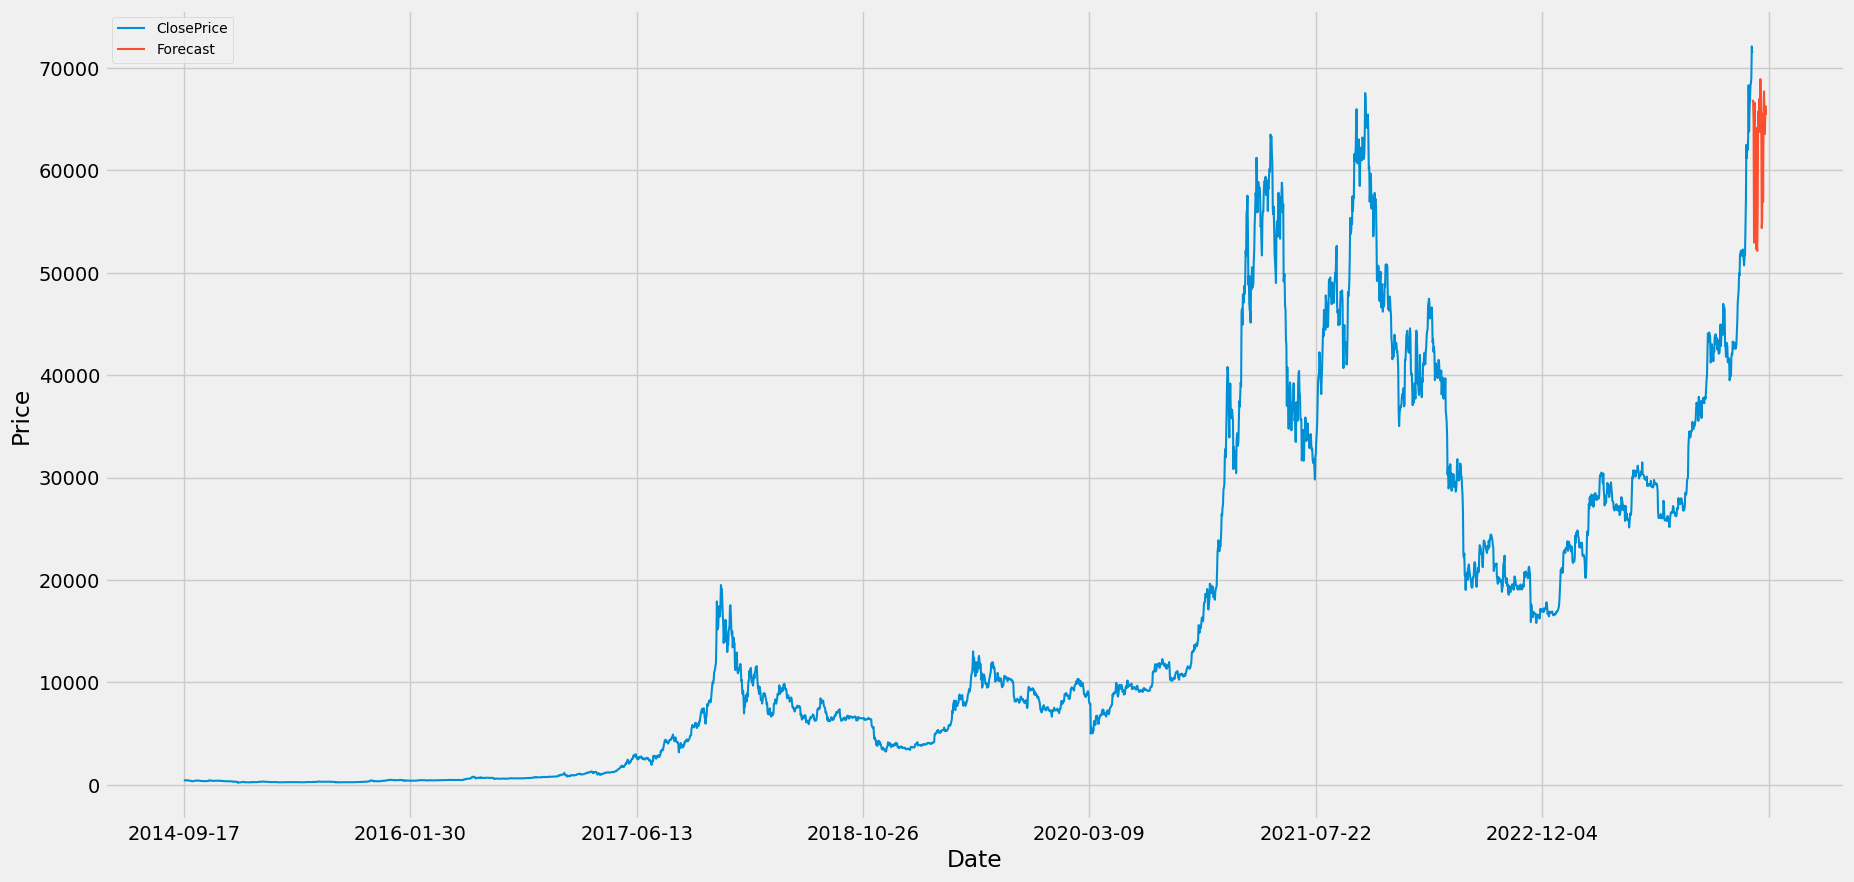

In [34]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':10})
plt.xlabel('Date')
plt.ylabel('Price')
